In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [79]:
flights = pd.read_csv('flight_data_2008.csv')

In [80]:
flights.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0


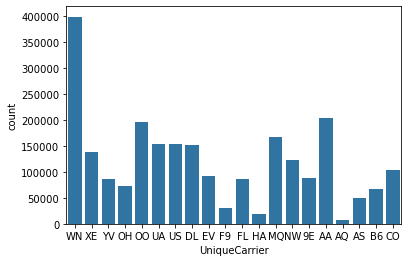

In [81]:
base_color = sb.color_palette()[0]
sb.countplot(data = flights, x = 'UniqueCarrier', color = base_color);

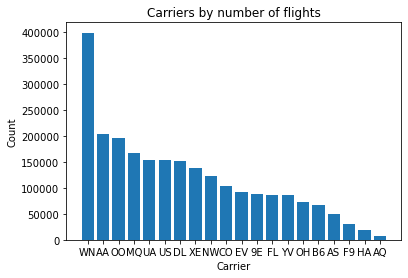

In [82]:
plt.bar(flights.UniqueCarrier.value_counts().index, flights.UniqueCarrier.value_counts().values)
plt.xlabel('Carrier')
plt.ylabel('Count')
plt.title('Carriers by number of flights');

- It looks like the most frequent carrier in terms of flights 'WN' has close to double the flights even the next most frequent carrier

### Graph relative frequency for Day of the Week

In [83]:
n_flights = len(flights)
max_dayofweek_count = flights.DayOfWeek.value_counts().values[0]
max_prop = max_dayofweek_count/ n_flights
max_prop

0.15300410134366196

In [84]:

tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14']

In [85]:
flights.DayOfWeek.value_counts().index

Int64Index([3, 2, 5, 4, 1, 7, 6], dtype='int64')

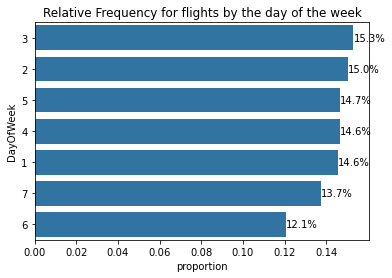

In [86]:
sb.countplot(data = flights, y = 'DayOfWeek', color = base_color, order = flights.DayOfWeek.value_counts().index)
plt.xticks(tick_props * n_flights, tick_names)
plt.xlabel('proportion')
plt.title('Relative Frequency for flights by the day of the week')
for i in range(flights.DayOfWeek.value_counts().shape[0]):
    count = flights.DayOfWeek.value_counts().values[i]
    pct_string = '{:0.1f}%'.format(100*count/n_flights)
    plt.text(count+1, i, pct_string, va = 'center');


- Saturday and Sunday are when flights are less frequent, with Saturday contributing over 2.5% less to overall flights than the weekday average

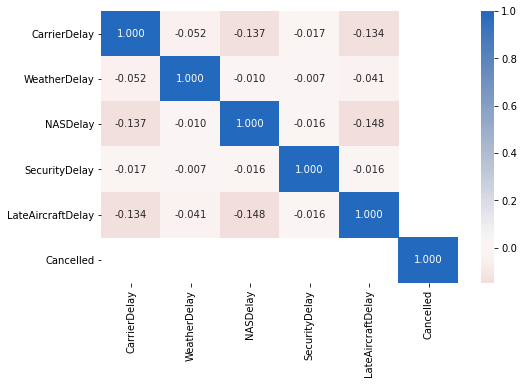

In [87]:
plt.figure(figsize = [8, 5])
sb.heatmap(flights[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'Cancelled']].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

In [88]:
flights['total_delay'] = flights['CarrierDelay'] + flights['WeatherDelay'] + flights['NASDelay'] + flights['SecurityDelay'] + flights['LateAircraftDelay']
flights['total_delay'] = flights['total_delay'].fillna(0)


In [89]:
flights['total_delay']

0          16.0
1           0.0
2           0.0
3           0.0
4          16.0
           ... 
2389212     0.0
2389213     0.0
2389214     0.0
2389215     0.0
2389216     0.0
Name: total_delay, Length: 2389217, dtype: float64

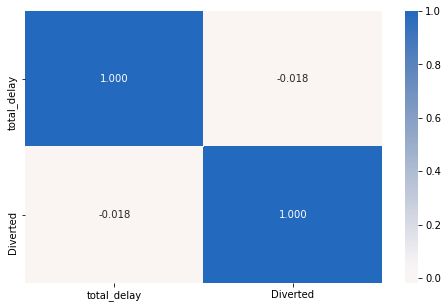

In [91]:
plt.figure(figsize = [8, 5])
sb.heatmap(flights[['total_delay', 'Diverted']].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

In [94]:
flights['date'] = flights['Month'].astype(str) + '/' + flights['DayofMonth'].astype(str) + '/' + flights['Year'].astype(str)

In [95]:
flights[abs(flights['ArrTime'] - flights['CRSArrTime']) > 500]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,total_delay,date
41,2008,1,3,4,13.0,1915,57.0,2005,WN,186,...,0,NaN,0,0.0,0.0,0.0,0.0,292.0,292.0,1/3/2008
130,2008,1,3,4,2245.0,1730,2354.0,1850,WN,186,...,0,NaN,0,282.0,0.0,0.0,0.0,22.0,304.0,1/3/2008
162,2008,1,3,4,2248.0,2125,102.0,2345,WN,890,...,0,NaN,0,7.0,0.0,0.0,0.0,70.0,77.0,1/3/2008
238,2008,1,3,4,2003.0,1905,26.0,2350,WN,1004,...,0,NaN,0,4.0,0.0,0.0,0.0,32.0,36.0,1/3/2008
252,2008,1,3,4,1945.0,1815,52.0,2335,WN,2450,...,0,NaN,0,13.0,0.0,0.0,0.0,64.0,77.0,1/3/2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388927,2008,4,17,4,1239.0,655,1442.0,926,DL,905,...,0,NaN,0,0.0,0.0,0.0,0.0,316.0,316.0,4/17/2008
2388957,2008,4,17,4,2231.0,2100,36.0,2334,DL,935,...,0,NaN,0,14.0,0.0,0.0,0.0,48.0,62.0,4/17/2008
2388958,2008,4,17,4,2154.0,2130,34.0,2349,DL,936,...,0,NaN,0,24.0,0.0,21.0,0.0,0.0,45.0,4/17/2008
2389099,2008,4,17,4,2059.0,2100,10.0,2353,DL,1100,...,0,NaN,0,0.0,0.0,17.0,0.0,0.0,17.0,4/17/2008


In [107]:
midnight_flights = flights[flights['ArrTime'] - flights['CRSArrTime'] < -300]

In [113]:
midnight_flights.ArrTime.astype(int).astype(str).str.pad(4, fillchar = '0')

41         0057
162        0102
238        0026
252        0052
257        0005
           ... 
2388670    0014
2388957    0036
2388958    0034
2389099    0010
2389191    0006
Name: ArrTime, Length: 28791, dtype: object